# A Minimum Working Example of MDA package (V0.0.1)

## Step 1: Setup

#### A magic to disable Jupyter notebook auto-scrolling

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

#### Setup the enviornments (Import Path, CPU, CUDA, Matplotlib)

In [2]:
import sys
sys.path.insert(0, '../')
import os
os.system("taskset -p 0xff %d" % os.getpid())
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
%matplotlib inline

%load_ext autoreload
%autoreload 2

## Step 2: Config

#### Construct the config parameter dict
#### Notes:
1. Iterator type parameter: if input iterator type parameters, the training engine will iterate on the product of all of them (iterating through the set of all possible combinations)
2. suffix: `config:suffix`: substrings after `x` and `y` and before `.npy` of those numpy array dumps. They should appear in pairs. E.g. suffix `7` here selects course `6.002x Spring 2017`
3. Temporal Dimension: `data:temporal_dim` replaced the old `cur_chap` (current predicting chapter) parameter. Name as `temporal_dim` could be understand by different process method differently, allow more possible behaviors. Other data specification parameters like `data:feature_dim` can be designed as iteration index too.
4. Verbosity:
 - 0: nothing
 - 1: mission progress bar
 - 2: mission itemize, epoch progress bar
 - 3: mission itemize, epoch itemize
5. Trial: if you simply want to repeat a mission (one training process with definite parameter) for many times, set `train:trial` as `iter(range(number_of_trials))`
6. Process / Split / Feed methods: `data/process_method` and so on
 - all inputs will be shuffled before these three operations
 - process: e.g. change the granularity by run-time aggregations, filter features of different time to preserve causality
 - split: split feature / label samples to train / test sets
 - feed: post-processing to fit the input / output of different types of models (e.g. the combined model of autoencoder and predictor has three outputs: reconstructing, embedding, predicting)
7. Metric: (`log:metric`): a dictionary with `{output_name: metric:name}` grammar, try to change metric to `fpr_binary_with_logits` and so on.
8. Callback: (`log:callback`): special evaluation after each mission (or even after each epoch in the future).

#### Hyper-parameter tuning
A config dictionary without iterator parameters (except from `train:trial`) are useful for hyper-parameter tuning.

Builder: AutoEncoder model CNN1D-AE is constructed.
Builder: Predictor model FC is constructed.
Builder: AutoEncoderWithPredictor model None is constructed.
Loader: Data loaded:
 - suffix: 7 - feature shape: (9743, 9, 29) - label shape: (9743, 9)
Logger: selected verbosity 2.
Trainer: Training started.
###### Mission Statistics: Total#:3 (train:trial#:3)
### Mission:1 (spt:0s-pst:0s-est:0s) train:trial:0
 - epoch: [===============================================>] 100.0%  - loss_train:5.3616e-01 - loss_test:5.4848e-01 - rct_mse_train:8.4691e-04 - rct_mse_test:8.7378e-04 - pdt_acc_train:6.9256e-01 - pdt_acc_test:6.6969e-01


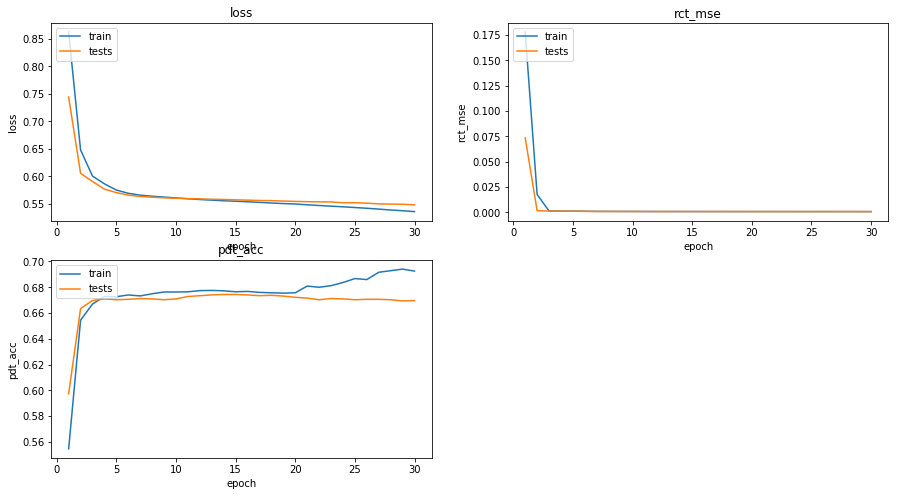

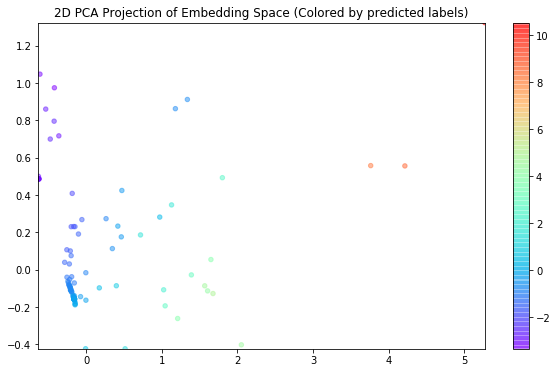

### Mission:2 (spt:17s-pst:17s-est:8s) train:trial:1
 - epoch: [===============================================>] 100.0%  - loss_train:5.1227e-01 - loss_test:5.3562e-01 - rct_mse_train:8.6536e-04 - rct_mse_test:7.7325e-04 - pdt_acc_train:7.2580e-01 - pdt_acc_test:7.2781e-01


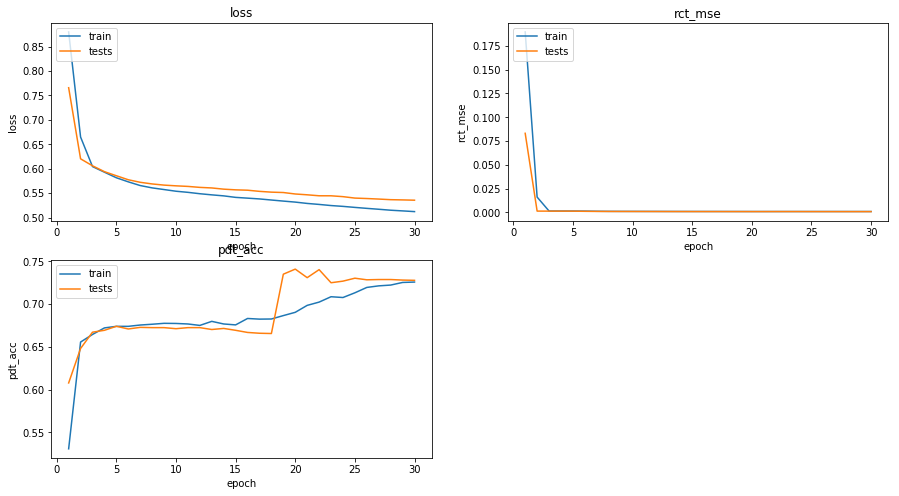

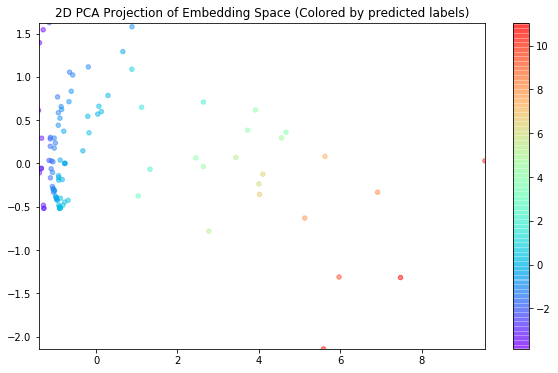

### Mission:3 (spt:17s-pst:34s-est:0s) train:trial:2


KeyboardInterrupt: 

In [3]:
paras = {
    # configuration
    'config': {
        # name of this task, will be used to create save directory and retrieve records
        'task_name': 'demo',
        # data directory, the folder contains the saved numpy arrays
        'data_dir': '../data/raw/transfer-all/',
        # result directory, the folder to save models and recordes
        'result_dir': '../result/',
        # suffix of the input data files
        'suffix': '7',
    },
    'data': {
        # feature shape: [number of samples, temporal dim, contextual dim, feature dim]
        # if no contextual dim, will be 3 dimensional
        'temporal_dim': 5,
        'contextual_dim': None,
        'feature_dim': 29,
        # label shape: [number of samples, temporal dim, label dim]
        'label_dim': 1,
        # post-processing operations of feature and label matrices
        'process_method': 'temporal',
        # train-test split method
        'split_method': 'cross_validation',
        # match the data batches with the model inputs/outputs
        'feed_method': 'combined',
    },
    'model': {
        # type of the model, options: predictor, autoencoder, ...
        'type': 'combined',
        # a class of structures
        'architecture': 'CNN1D-AE+FC',
        # output activation of the model
        'out_activation': 'sigmoid',
        # regularization weight
        'regularization': 0,
        # dropout probability
        'dropout_prob': 0,
    },
    'train': {
        # numer of epochs to train each model
        'nepochs': 30,
        # optimizing algorithm
        'optimizer': 'Adam',
        # batch size
        'batch_size': 128,
        # learning rate
        'learning_rate': 0.001,
        # decay parameter of learning rate
        'decay': 0,
        # number of trials for each model
        'trial': iter(range(3)),
    },
    'log': {
        # metric to calculate, for each specific output
        'metric': {'rct': 'mse', 'pdt': 'acc'},
        # callback functions, executed after each trial
        'callback': ['learning_curve', 'pca2d'],
        # verbosity of logs
        'verbosity': 2,
    },
}

from mldsa.core.manager import Manager

Manager(paras)()

#### Run all missions

In [ ]:
paras = {
    'config': {
        'task_name': 'demo',
        'data_dir': '../data/raw/transfer-all/',
        'result_dir': '../result/',
        'suffix': '7',
    },
    'data': {
        'temporal_dim': iter(range(1, 9)),
        'contextual_dim': None,
        'feature_dim': 29,
        'label_dim': 1,
        'process_method': 'temporal',
        'split_method': 'cross_validation',
        'feed_method': 'autoencode',
    },
    'model': {
        'type': 'autoencoder',
        'architecture': 'CNN1D-AE',
        'fc_hidden_dims': [],
        'fc_activation': None,
        'out_activation': 'sigmoid',
        'regularization': 0,
        'dropout_prob': 0,
    },
    'train': {
        'nepochs': 50,
        'optimizer': 'Adam',
        'batch_size': 128,
        'learning_rate': 0.001,
        'decay': 0,
        'trial': iter(range(3)),
    },
    'log': {
        'metric': {'pdt': 'accuracy_binary_with_logits'},
        'callback': ['learning_curve'],
        'verbosity': 2,
    },
}

#Manager(paras)()

#### Research objectives:
TO BE DISCUSSED

#### Main development objectives:
1. Enrich basic and advanced model blocks, a encapsulation of PyToch layers, reimplement all we used
2. Enrich predictors and autoencoders, reimplement all we used
3. Refactor & design result, recorder, and analyzer classes, allow flexible comparison
4. Design data / result management systems, which aim to keep track of all data / result with richer logs / description
5. Preprocessing, direct visualization and synthetic data generator, integrate to current pipeline
6. Refactor model hierarchy, increase code reuse and allow flexible configuring at run-time

#### Some other detailed development ideas:
1. Model specific parameters (eg: `model:fc_hidden_dims`): going to be deprecated, a better practice is to allow parameter type query, i.e. give user a chance to know what should be input
2. Data specific parameters (eg: `data:feature_dim`): going to de deprecated, should enable auto-config from the data input
3. Matching between model outputs and metric functions: if by name, should add output naming mechanism to model types
4. Change from continuous logging to query logging: since Jupyter has a shortcoming that the stdout stream cannot be resumed easily once interrupted, should change to query logging, e.g. log to file and can query status by calling a function of manager class at any time